In [8]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [10]:
# Define the figure size and dpi
fig_width = 6.9  # inches
fig_height = 3.5  # inches
fig_dpi = 350

plt.rcParams.update({
    'figure.figsize': (fig_width, fig_height),
    'figure.dpi': fig_dpi,

    # Fonts
    'font.size': 12,

    # Axes
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'axes.linewidth': 1,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 1,
    'grid.color': 'gray',

    # Legend
    'legend.fontsize': 8,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fancybox': False,
    'legend.edgecolor': 'gray',
    'legend.facecolor': 'white',
    'legend.borderaxespad': 0.5,
    'legend.borderpad': 0.4,
    'legend.labelspacing': 0.5,

    # Lines
    'lines.linewidth': 2.0,
    'lines.markersize': 2,
    'axes.labelsize': 10,
    'axes.titlesize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
})

In [11]:
df_cordis = pd.read_csv(pathlib.Path("csv/cordis_val_results.csv"))

In [12]:
# Calculate the mean and standard deviation of cohr and disp_perc per ntopics
df_cordis = df_cordis.groupby('ntopics').agg({'cohr': ['mean', 'std'], 'disp_perc': ['mean', 'std']}).reset_index()

# Flatten the column names for easier access
df_cordis.columns = ['ntopics', 'cohr_mean', 'cohr_std', 'disp_perc_mean', 'disp_perc_std']

df_cordis

,ntopics,cohr_mean,cohr_std,disp_perc_mean,disp_perc_std
0,5,0.049197,0.009852,51.934949,0.629903
1,10,0.064433,0.006106,69.317592,0.447089
2,20,0.074197,0.004813,79.907649,0.147565
3,30,0.069052,0.005535,84.811500,0.093926
4,40,0.064349,0.005001,87.521517,0.098005
5,50,0.059068,0.003958,89.171389,0.236271
6,60,0.052987,0.004719,90.359695,0.222205
7,70,0.049489,0.004243,91.169482,0.149286
8,80,0.044076,0.004555,91.844984,0.126012
9,90,0.039582,0.004178,92.448069,0.098685


In [13]:
df_cancer = pd.read_csv(pathlib.Path("csv/cancer_val_results.csv"))

In [14]:
# Calculate the mean and standard deviation of cohr and disp_perc per ntopics
df_cancer = df_cancer.groupby('ntopics').agg({'cohr': ['mean', 'std'], 'disp_perc': ['mean', 'std']}).reset_index()

# Flatten the column names for easier access
df_cancer.columns = ['ntopics', 'cohr_mean', 'cohr_std', 'disp_perc_mean', 'disp_perc_std']

df_cancer

,ntopics,cohr_mean,cohr_std,disp_perc_mean,disp_perc_std
0,5,0.071630,0.004469,48.848180,0.546608
1,10,0.096251,0.006174,68.421982,0.640555
2,20,0.101355,0.004793,80.900724,0.345362
3,30,0.105301,0.004980,85.650251,0.126649
4,40,0.107658,0.004692,88.345520,0.103950
5,50,0.112787,0.004800,90.156411,0.079043
6,60,0.115907,0.003891,91.448407,0.061219
7,70,0.119278,0.004658,92.426147,0.000264
8,80,0.120448,0.003268,93.206868,0.045256
9,90,0.123093,0.003519,93.811700,0.041885


In [15]:
df_ai = pd.read_csv(pathlib.Path("csv/ai_val_results.csv"))

In [16]:
# Calculate the mean and standard deviation of cohr and disp_perc per ntopics
df_ai = df_ai.groupby('ntopics').agg({'cohr': ['mean', 'std'], 'disp_perc': ['mean', 'std']}).reset_index()

# Flatten the column names for easier access
df_ai.columns = ['ntopics', 'cohr_mean', 'cohr_std', 'disp_perc_mean', 'disp_perc_std']

df_ai

,ntopics,cohr_mean,cohr_std,disp_perc_mean,disp_perc_std
0,5,0.073630,0.010771,41.915047,1.091706
1,10,0.090484,0.005750,63.289167,0.698954
2,20,0.107546,0.002965,78.176236,0.213779
3,30,0.112610,0.003339,83.897409,0.151421
4,40,0.115736,0.003027,87.064019,0.111959
5,50,0.115167,0.002944,89.100351,0.121879
6,60,0.114824,0.002305,90.511405,0.114269
7,70,0.114841,0.002129,91.567385,0.094242
8,80,0.115406,0.002942,92.372861,0.078713
9,90,0.114915,0.002648,93.021697,0.072164


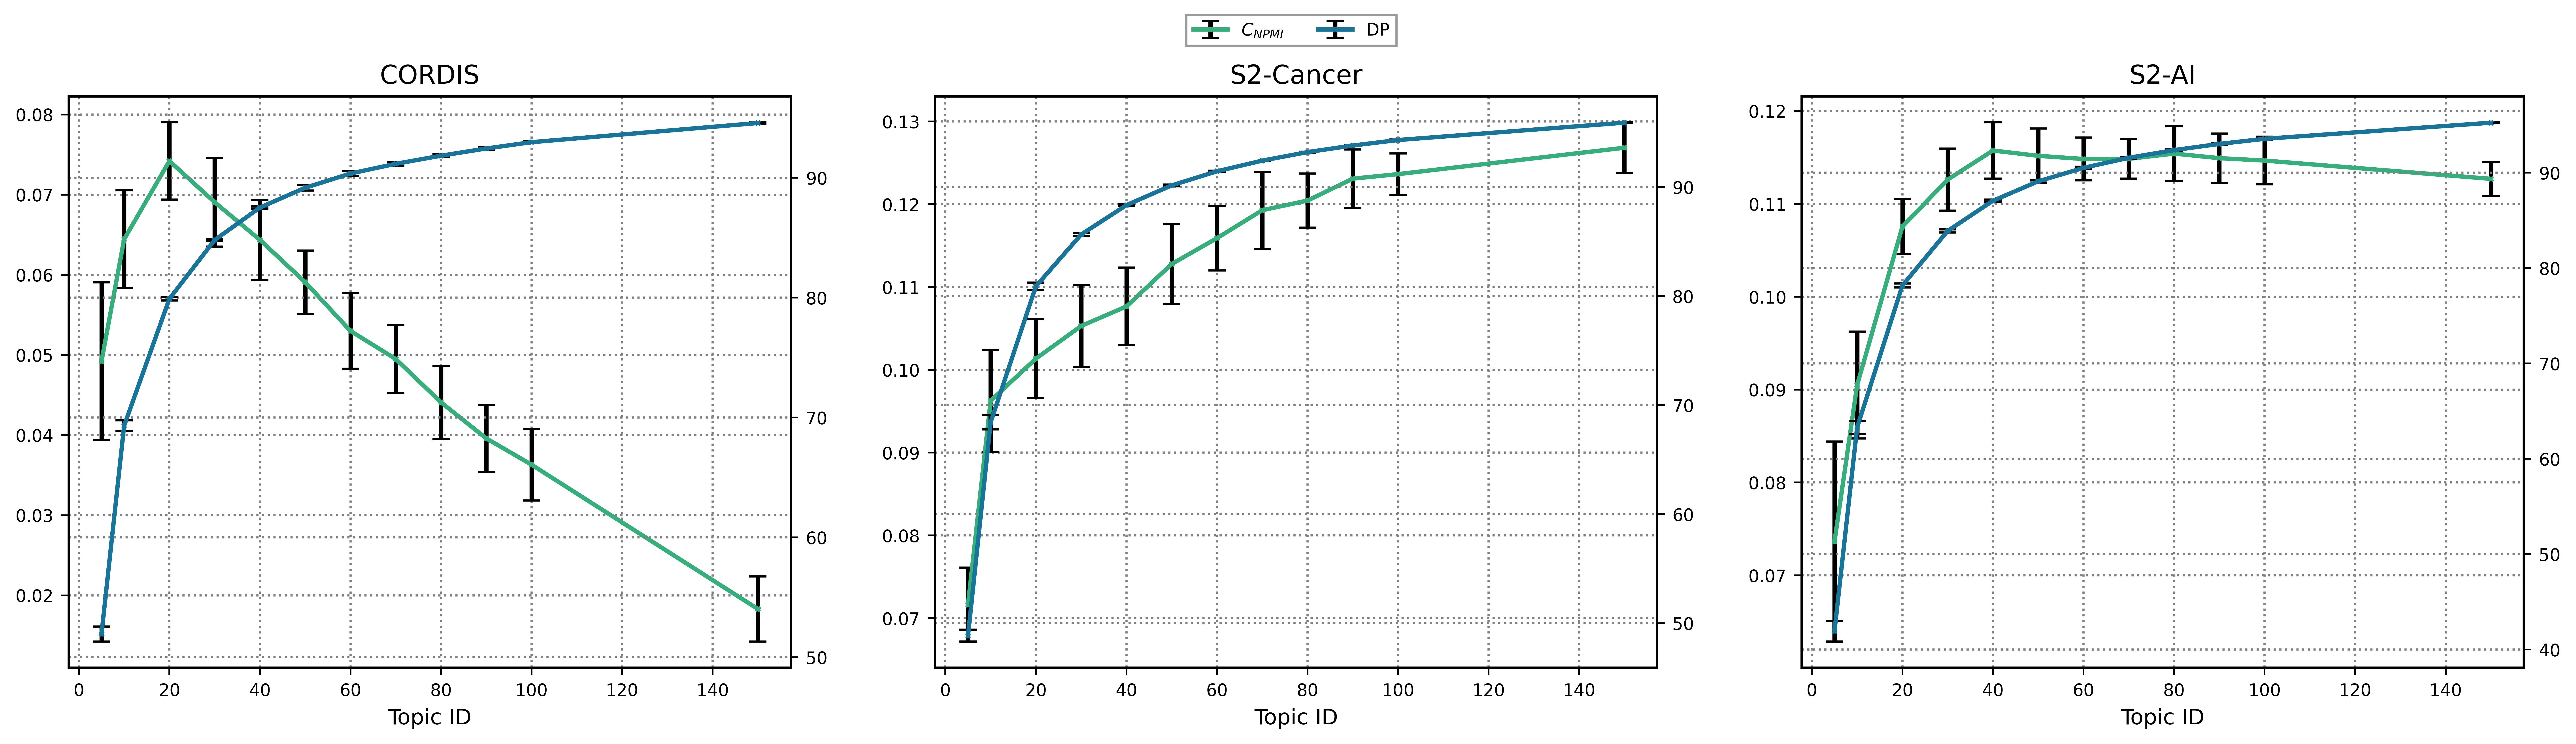

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (20.5, 4.8))
dfs = [df_cordis, df_cancer, df_ai]
titles = ["CORDIS", "S2-Cancer", "S2-AI"]
y_repr = ['cohrs_cv', 'cohrs_npmi', 'entropies']
y_labels = ['Coherence CV', 'Coherence NPMI', 'Entropy']
colors = ["#2D6187", "#28ABB9", "#387838"]

labels_all = []
handles_all = []
for df, color, ax, title in zip(dfs, colors, axs.flat, titles):
    
    ax.errorbar(
        df['ntopics'],
        df['cohr_mean'],
        yerr=df['cohr_std'],
        fmt='x-',
        ecolor='black',
        capsize=4,
        color='#36AE7C',
        label='$C_{NPMI}$')

    # Creating a twin axis on the right side for 'disp_perc'
    ax2 = ax.twinx()
    ax2.errorbar(
        df['ntopics'],
        df['disp_perc_mean'],
        yerr=df['disp_perc_std'], 
        fmt='x-',
        ecolor='black',
        capsize=4,
        color='#187498',
        label='DP')
    
    # if title == "CORDIS" or title == "Cancer":
    #    ax2.set_yticks([])
    
    #if title == "S2CS-AI":
    #    ax2.set_ylabel('Thetas dispersion %')
        
    #if title == "CORDIS":
    #    ax.set_ylabel('Coherence NPMI')

    ax.grid(True)
    ax.set_xlabel('Topic ID')
    ax.set_title(title)
    ax2.grid(True)
    #ax.get_legend().remove()
    handles, labels = ax.get_legend_handles_labels()
    labels_all += labels
    handles_all += handles

handles_all, labels_all = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

fig.legend(handles_all+handles2, labels_all+labels2, loc='upper center', ncol=2, bbox_to_anchor=(0.511, 1.001),
           frameon=True, shadow=False)

save_fig = "images/var_mallets.png"
fig.savefig(save_fig, dpi='figure', bbox_inches='tight')